In [1]:
from Objects.Transformations import *
from Objects.WSBM import *
from Objects.TWSBMInstance import *

from Plotting.Plotting import *

In [2]:
metrics = {}
for rho, pi in product(RHOS, PIS):
	metrics[(rho, pi)] = {}
	for model, model_params in MODELS_AND_PARAMS:
		m = model(rho, pi, model_params)
		A, Z = m(42)
		metrics[(rho, pi)][m] = {}
		for t in TRANSFORMS:
			metrics[(rho, pi)][m][t] = TWSBMInstance(model = m, transformation = t, A = t(A), Z = Z)

In [12]:
def plot_embedding(rho, pi, metrics, n = n):
	def label_permutation(Z_true, Z_pred):
		matches_no_swap = np.sum(Z_true == Z_pred)
		matches_swap = np.sum(Z_true == (1 - Z_pred))
		if matches_swap > matches_no_swap:
			return 1 - Z_pred
		else:
			return Z_pred
	
	def switch(mode='Truth'):
		n_rows, n_cols = len(metrics), len(list(metrics.values())[0].values())
		fig, axes = plt.subplots(n_rows, n_cols, figsize=(2 + 2.5*n_cols, 2 + 3*n_rows))
		global_title = model_str(n, rho, pi)
		fig.suptitle(global_title, fontsize=20)
		for i, (model, model_metrics) in enumerate(metrics.items()):
			axes[i, 0].set_ylabel(model.name + "\n")
			for j, G in enumerate(model_metrics.values()):
				Z, X, Z_hat, M, Σ, C_true, C_graph, C_embedding, RAND = G.Z, G.X, G.Z_hat, G.M, G.Σ, G.C_true, G.C_graph, G.C_embedding, G.RAND
				Z_hat = label_permutation(Z, Z_hat)
				ax = axes[i][j]
				plt.sca(ax)
				if mode == 'Truth':
					ax.scatter(X[:, 0], X[:, 1], c=Z, cmap='bwr', marker='.', alpha=0.2)
				else:
					ax.scatter(X[:, 0], X[:, 1], c=Z_hat, cmap='bwr', marker='.', alpha=0.2)
				ax.set_xticks([])
				ax.set_yticks([])
				for mean, cov in zip(M, Σ):
					eigenvalues, eigenvectors = np.linalg.eigh(cov)
					angle = np.degrees(np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0]))
					width, height = 2 * np.sqrt(6 * eigenvalues)
					ellip = plt.matplotlib.patches.Ellipse(
						mean, width, height, angle=angle, edgecolor='k', facecolor='none', linestyle='solid'
					)
					ax.add_patch(ellip)
				transform_name = G.transform_name + "\n" if i == 0 else ""
				title = (
					transform_name
					+ f"RI: {RAND:.2f} "
					+ f"CT: {C_true:.5f}\n"
					+ f"CG: {C_graph:.5f} "
					+ f"CE: {C_embedding:.5f}"
				)
				ax.set_title(title)
		plt.tight_layout()
		plt.show()

	#widgets.interact(switch, mode=['Truth', 'Prediction'])
	switch('Truth')
	switch('Prediction')

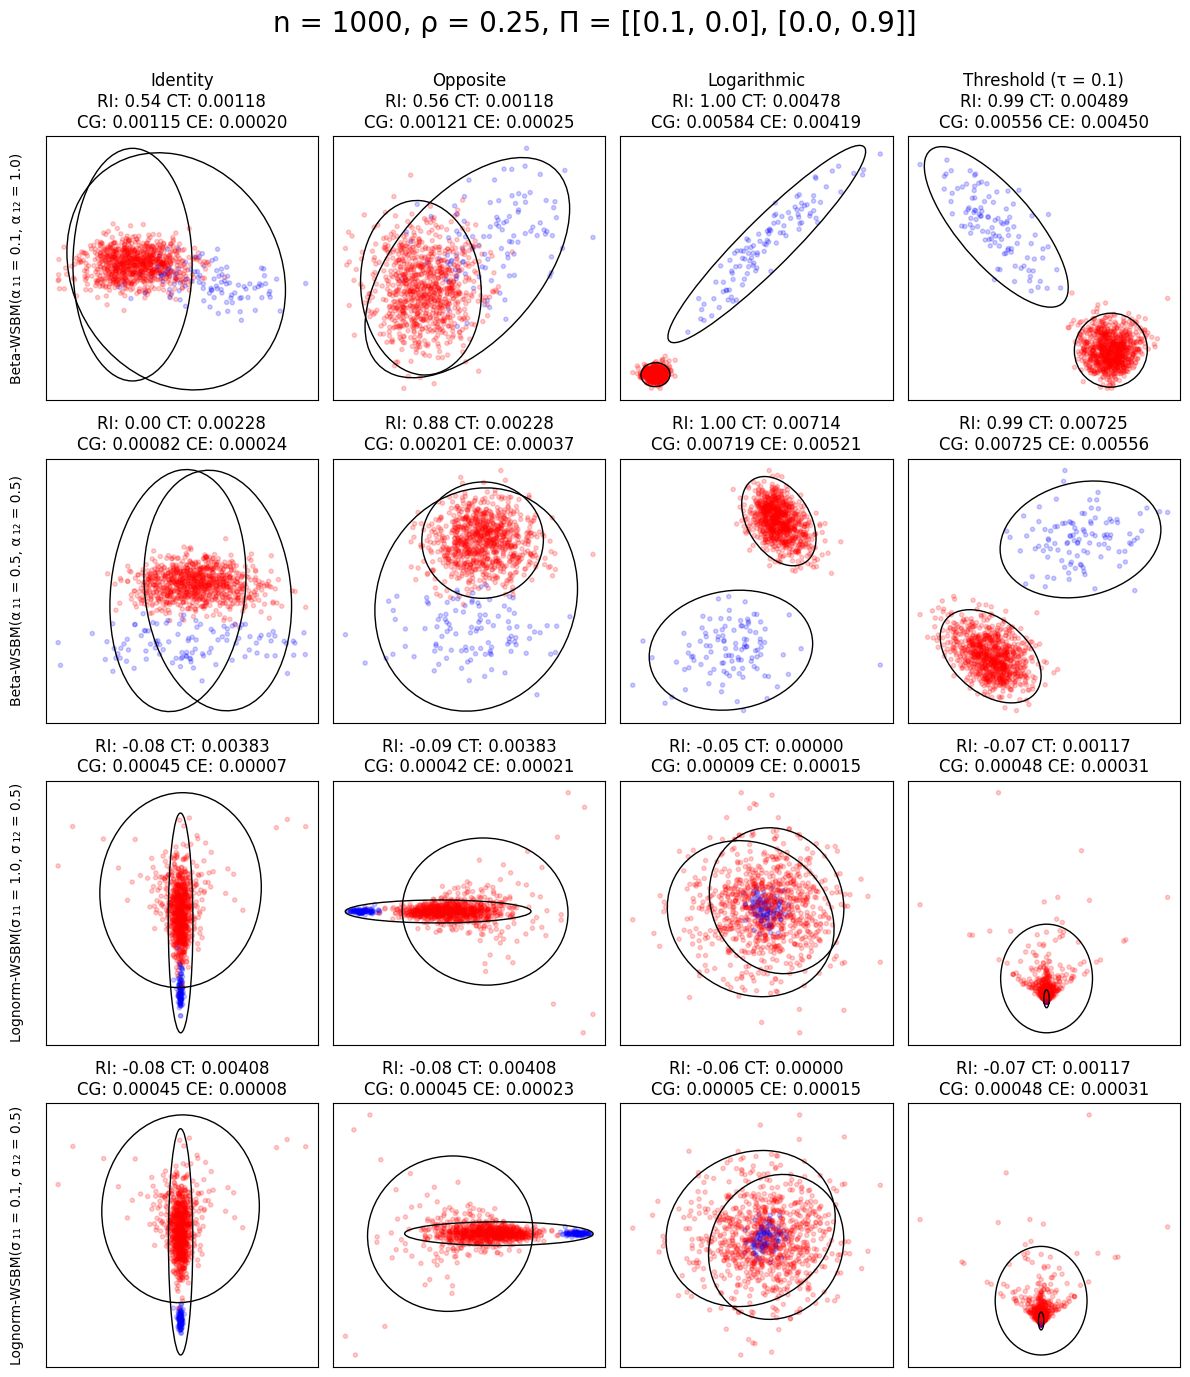

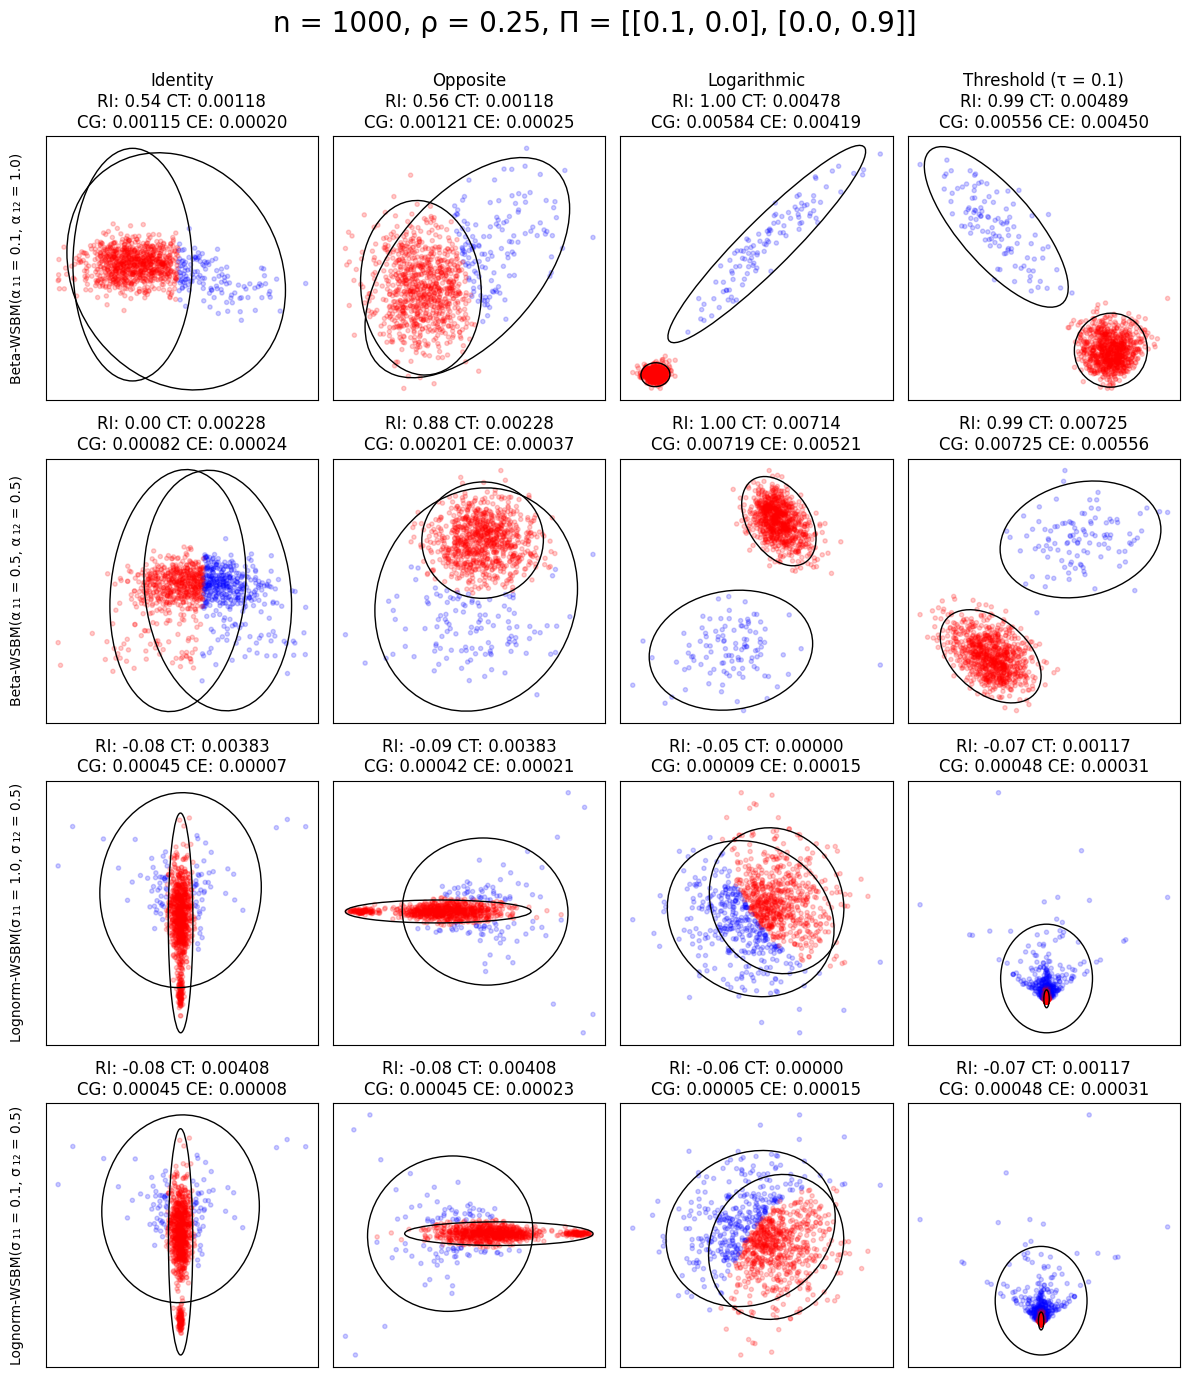

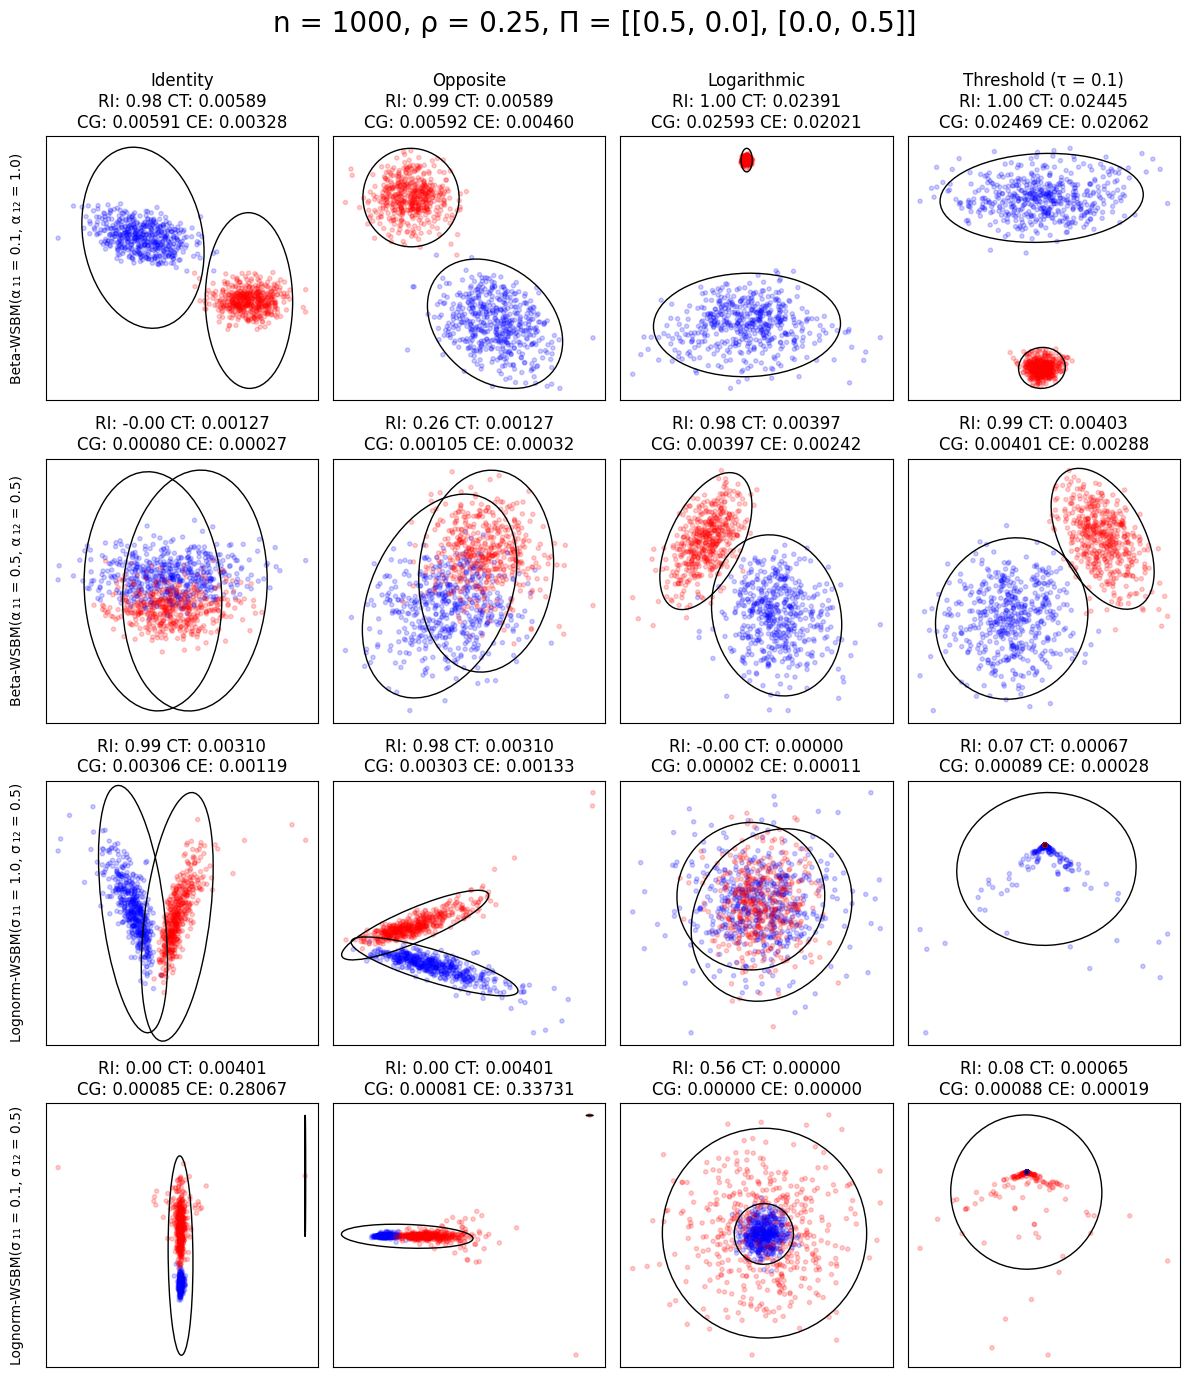

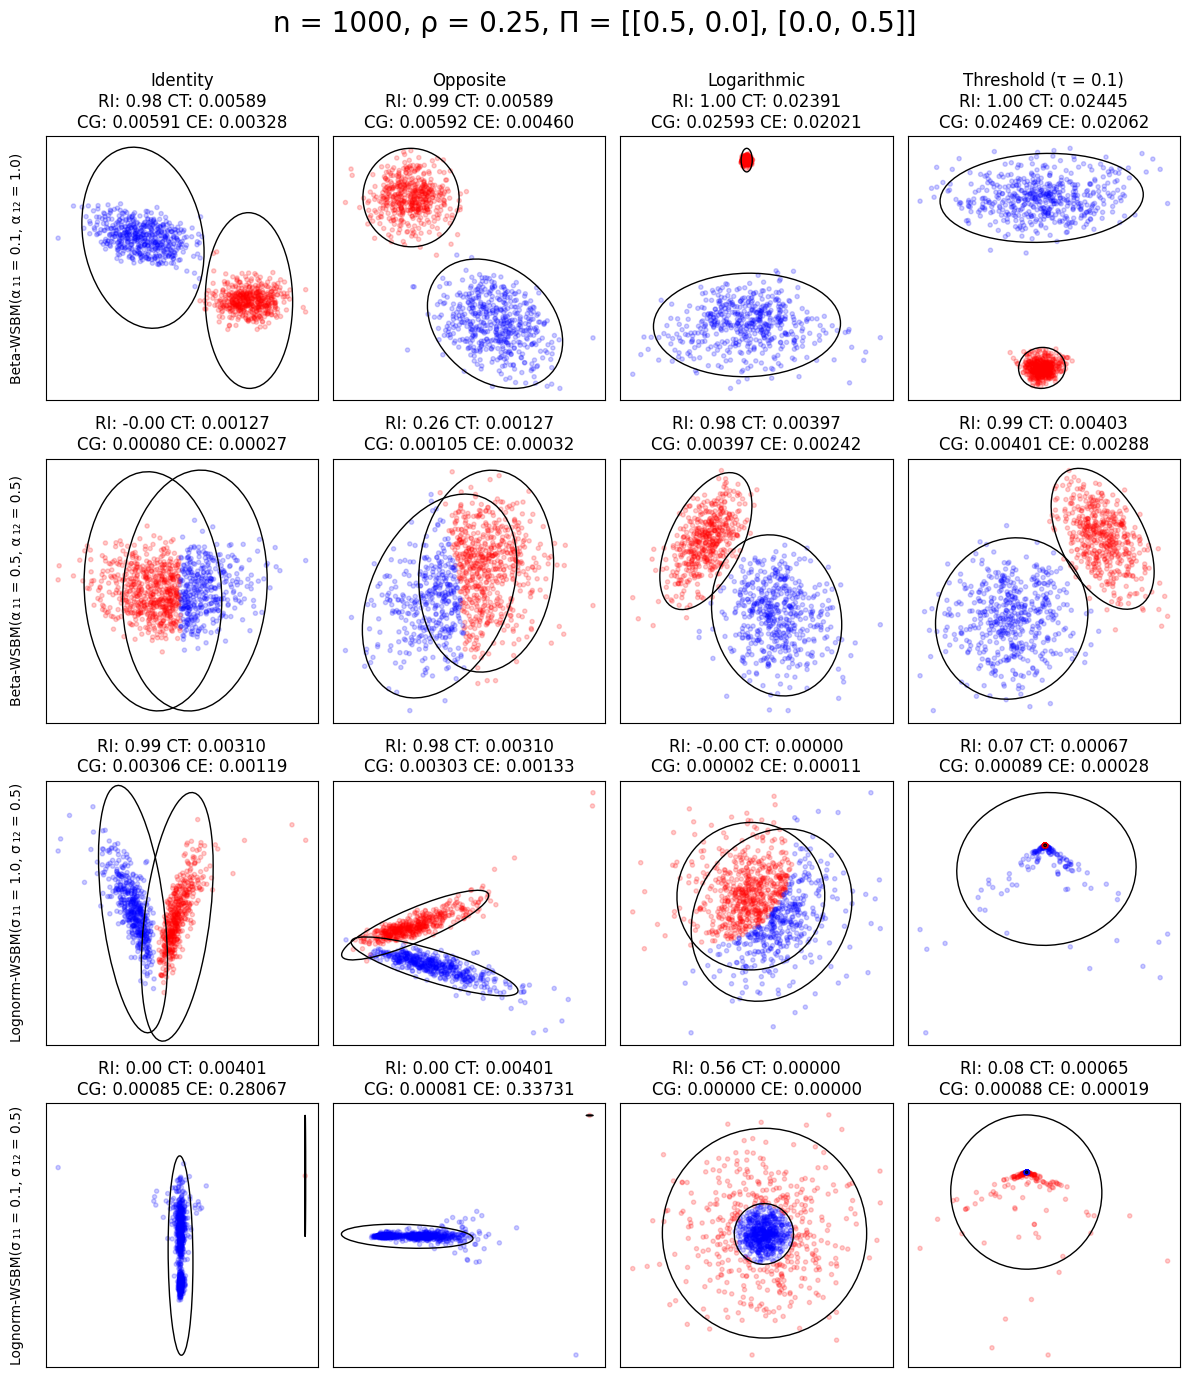

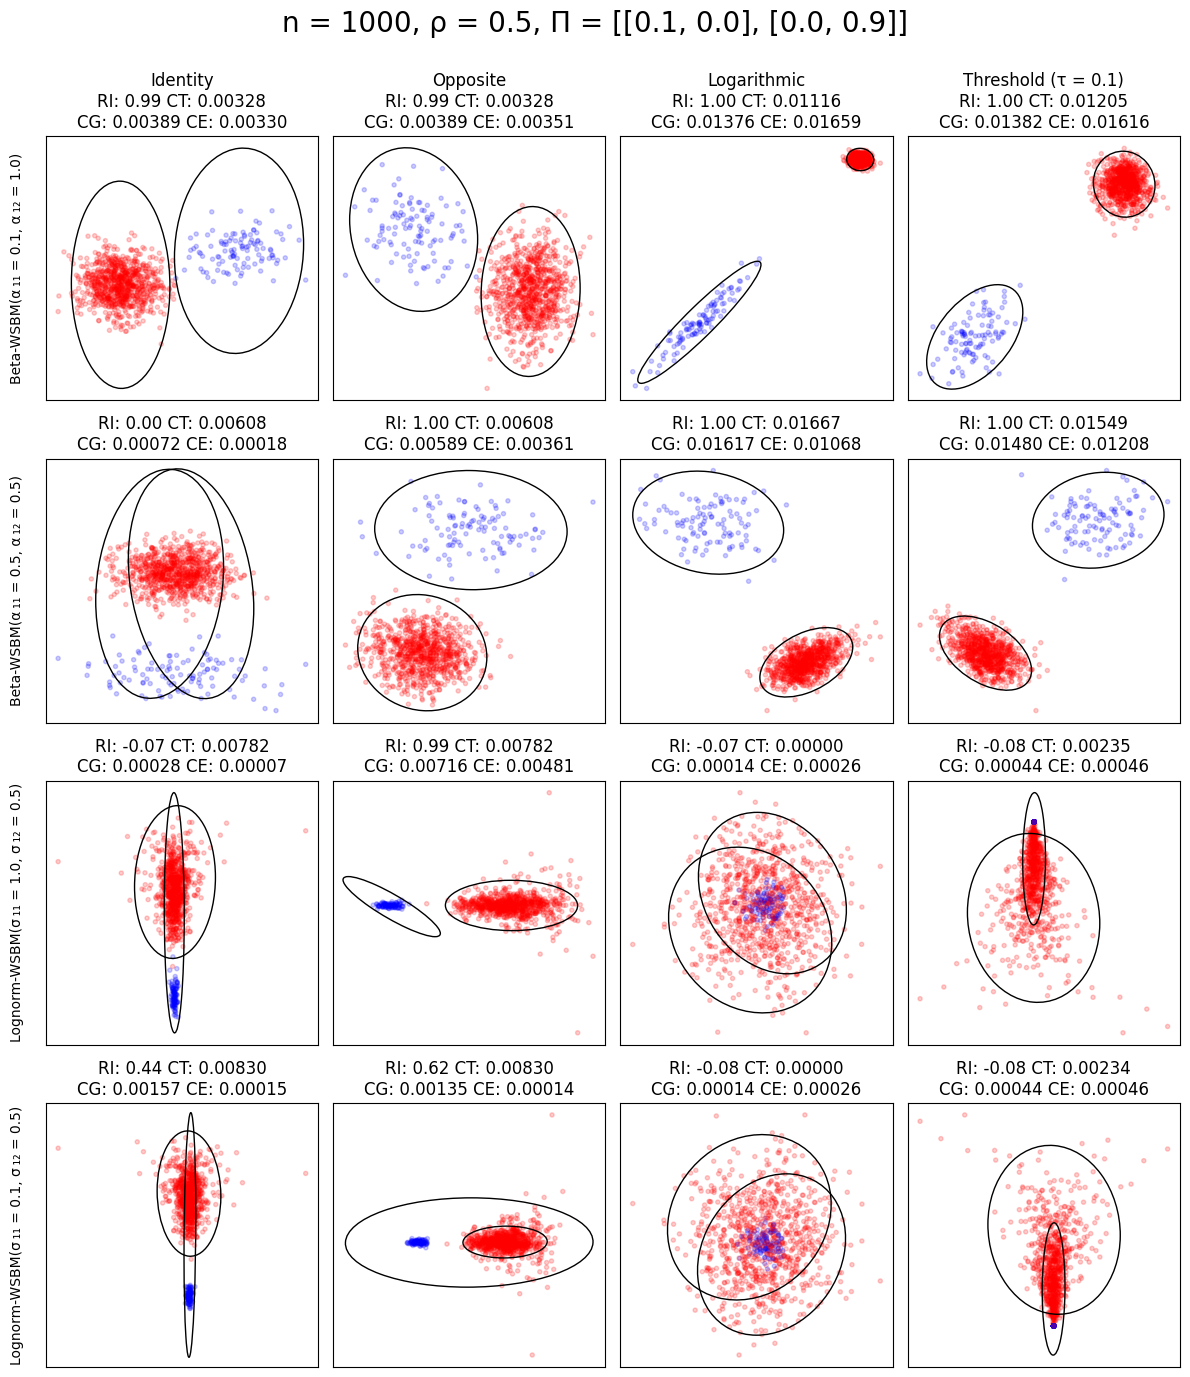

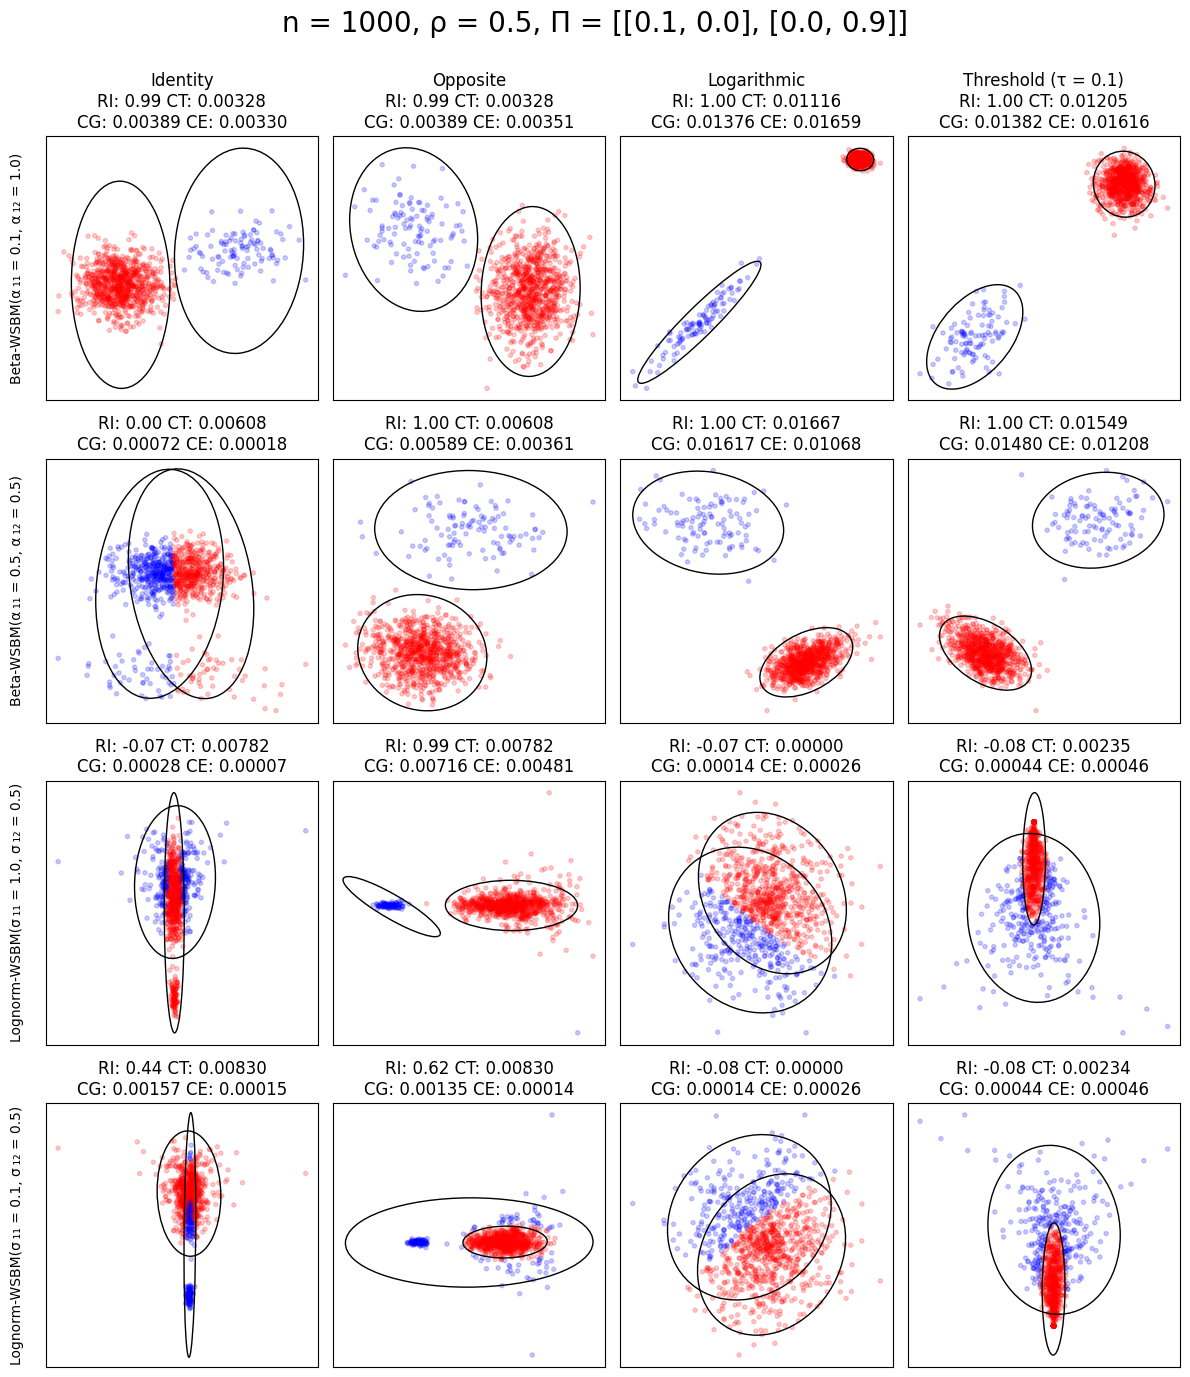

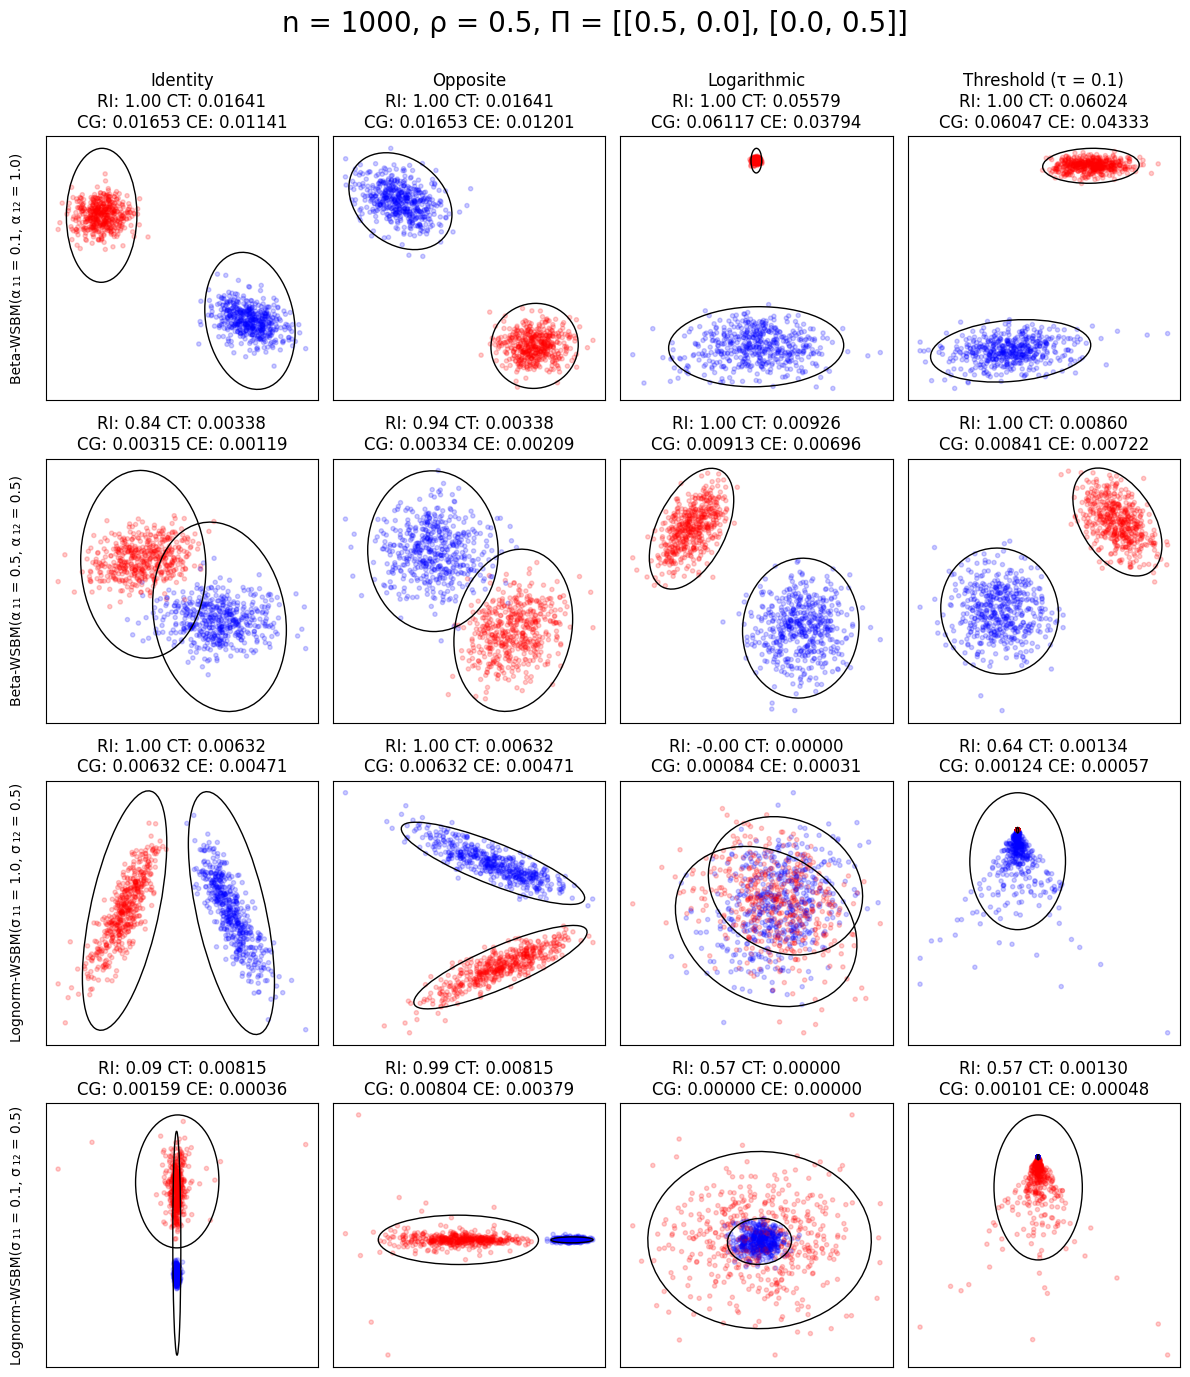

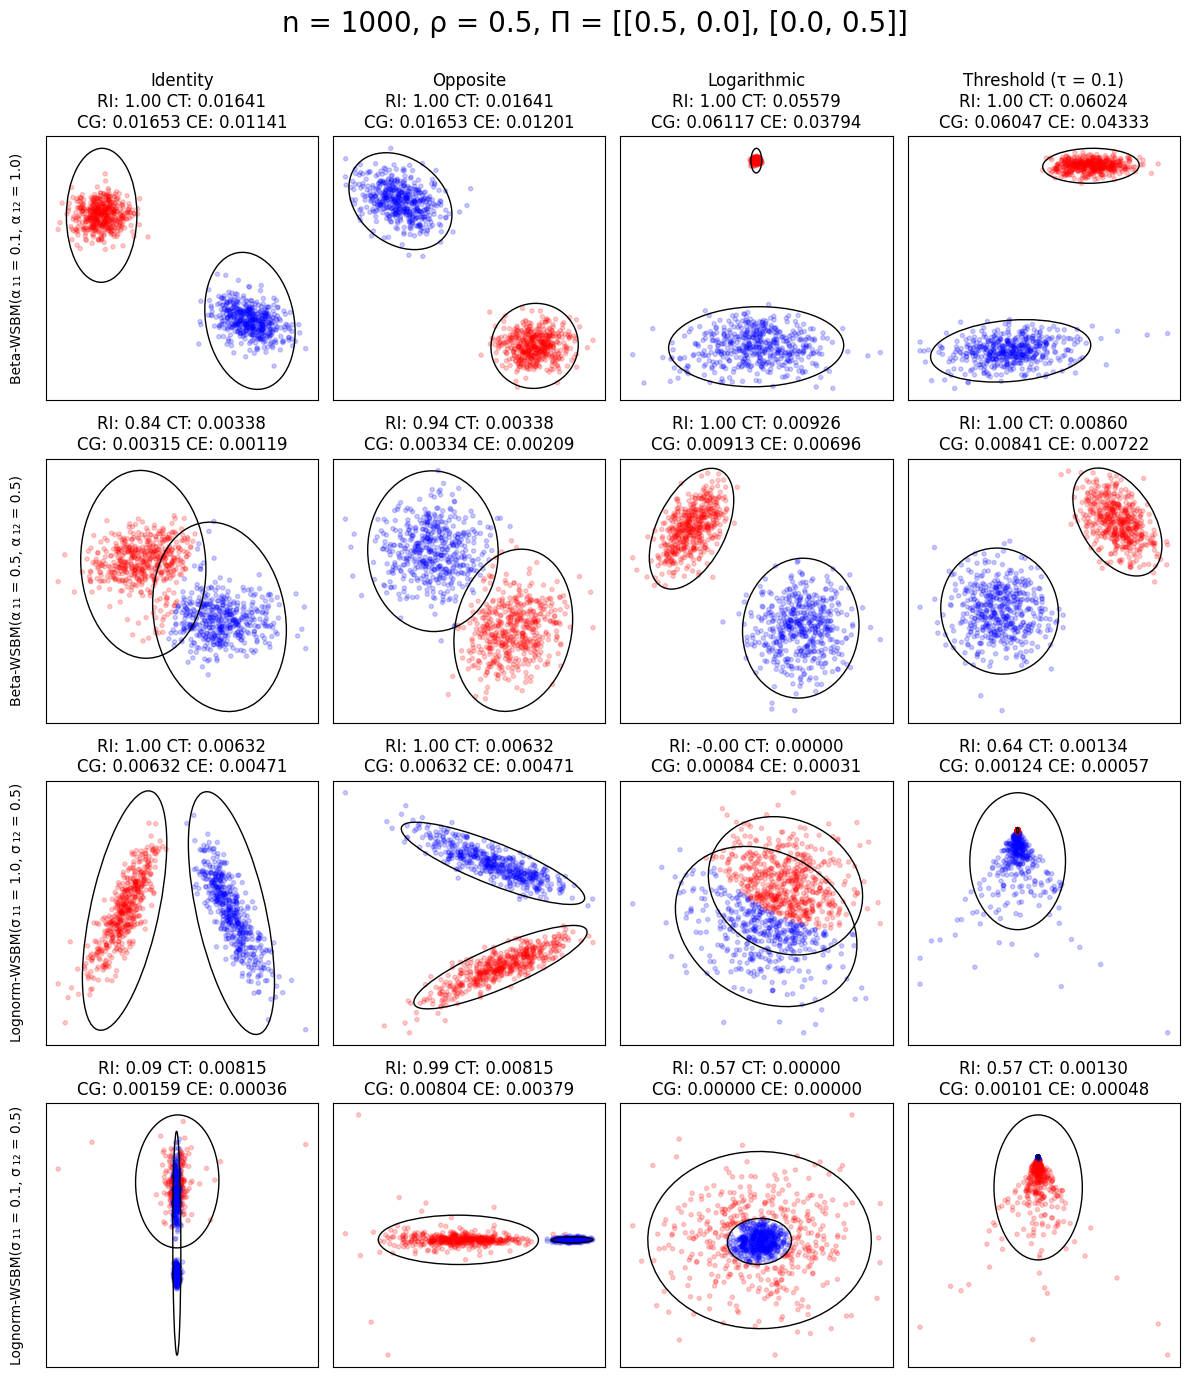

In [13]:
for rho, pi in product(RHOS, PIS):
	plot_embedding(rho, pi, metrics[(rho, pi)])